In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import numpy as np

In [2]:
accidents_by_person2020notedited = pd.read_csv('/Users/anastasiasadova/Desktop/2020_accidents_persones_gu_bcn.csv')

In [3]:
accidents_by_person2020notedited.shape

(13810, 30)

In [4]:
accidents_by_person2020notedited.dtypes

Numero_Expedient                             object
Codi_districte                                int64
Nom_districte                                object
Codi_barri                                    int64
Nom_barri                                    object
Codi_carrer                                   int64
Nom_carrer                                   object
Num_postal                                   object
Descripcio_dia_setmana                       object
Dia_setmana                                   int64
Descripcio_tipus_dia                         object
NK_ Any                                       int64
Mes_ any                                      int64
Nom_mes                                      object
Dia_mes                                       int64
Descripcio_torn                              object
Hora_dia                                      int64
Descripcio_causa_vianant                     object
Desc_Tipus_vehicle_implicat                  object
Descripció_s

In [5]:
accidents_by_person2020notedited['Descripció_tipus_persona'].unique()

array(['Conductor', 'Vianant', 'Passatger', 'Desconegut'], dtype=object)

In [6]:
accidents_by_person2020notedited['Descripcio_Lloc_atropellament_vianat'].unique()

array(['Desconegut                                                                                                                                            ',
       'En pas regulat per semŕfor                                                                                                                            ',
       'En pas sense regular                                                                                                                                  ',
       'Fora del pas                                                                                                                                          ',
       'A la vorera / Andana                                                                                                                                  ',
       'En zona peatonal                                                                                                                                      ',
       'En pas sense senyalitzar  

In [7]:
# Strip leading and trailing spaces
accidents_by_person2020notedited['Descripcio_Lloc_atropellament_vianat'] = (
    accidents_by_person2020notedited['Descripcio_Lloc_atropellament_vianat']
    .str.strip()  # Removes leading and trailing spaces
)

In [8]:
# Replace multiple spaces with a single space
accidents_by_person2020notedited['Descripcio_Lloc_atropellament_vianat'] = (
    accidents_by_person2020notedited['Descripcio_Lloc_atropellament_vianat']
    .str.replace(r'\s+', ' ', regex=True)  # Normalizes internal spaces
)

In [9]:
# Display unique values after normalization
print(accidents_by_person2020notedited['Descripcio_Lloc_atropellament_vianat'].unique())

['Desconegut' 'En pas regulat per semŕfor' 'En pas sense regular'
 'Fora del pas' 'A la vorera / Andana' 'En zona peatonal'
 'En pas sense senyalitzar' 'Altres']


In [10]:
accidents_by_person2020notedited = accidents_by_person2020notedited.drop_duplicates()

In [11]:
accidents_by_person2020notedited.isnull().sum() 

Numero_Expedient                            0
Codi_districte                              0
Nom_districte                               0
Codi_barri                                  0
Nom_barri                                   0
Codi_carrer                                 0
Nom_carrer                                  0
Num_postal                                  0
Descripcio_dia_setmana                      0
Dia_setmana                                 0
Descripcio_tipus_dia                        0
NK_ Any                                     0
Mes_ any                                    0
Nom_mes                                     0
Dia_mes                                     0
Descripcio_torn                             0
Hora_dia                                    0
Descripcio_causa_vianant                    0
Desc_Tipus_vehicle_implicat                 0
Descripció_sexe                             0
Edat                                        0
Descripció_tipus_persona          

In [12]:
accidents_by_person2020notedited

,Numero_Expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,Dia_setmana,...,Edat,Descripció_tipus_persona,Descripcio_Lloc_atropellament_vianat,Descripcio_Motiu_desplaĂ§ament_vianant,Descripcio_Motiu_desplaĂ§ament_conductor,Descripcio_victimitzacio,Coordenada_UTM_X,Coordenada_UTM_Y,Longitud,Latitud
0,2020S000001,7,Horta-Guinardó,36,la Font d'en Fargues,194406,Maragall,0353 0355,Dimecres,20200101,...,29,Conductor,Desconegut,Desconegut,Es desconeix,Il.lčs,430501.45,4586751.53,2.167116,41.427474
1,2020S000002,3,Sants-Montjuďc,16,la Bordeta,169409,Corts Catalanes,0203 0203,Dimecres,20200101,...,26,Vianant,En pas regulat per semŕfor,Oci i entreteniment,Desconegut,Ferit lleu: Hospitalització fins a 24h,428225.71,4580279.72,2.140650,41.368985
2,2020S000002,3,Sants-Montjuďc,16,la Bordeta,169409,Corts Catalanes,0203 0203,Dimecres,20200101,...,31,Conductor,En pas regulat per semŕfor,Desconegut,Taxi,Il.lčs,428225.71,4580279.72,2.140650,41.368985
3,2020S000003,2,Eixample,8,l'Antiga Esquerra de l'Eixample,320704,Sarriŕ,0018 0018,Dimecres,20200101,...,42,Conductor,Desconegut,Desconegut,Oci i entreteniment,Ferit lleu: Hospitalització fins a 24h,428532.59,4582672.59,2.144037,41.390564
4,2020S000003,2,Eixample,8,l'Antiga Esquerra de l'Eixample,320704,Sarriŕ,0018 0018,Dimecres,20200101,...,36,Conductor,Desconegut,Desconegut,Taxi,Il.lčs,428532.59,4582672.59,2.144037,41.390564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13805,2020S006276,1,Ciutat Vella,2,el Barri Gňtic,701266,Litoral (Llobregat),1070000,Dijous,20201231,...,48,Conductor,Desconegut,Desconegut,Altres activitats,Ferit lleu: Hospitalització fins a 24h,431410.40,4581077.37,2.178636,41.376447
13806,2020S006276,1,Ciutat Vella,2,el Barri Gňtic,701266,Litoral (Llobregat),1070000,Dijous,20201231,...,16,Conductor,Desconegut,Desconegut,Altres activitats,Ferit lleu: Hospitalització fins a 24h,431410.40,4581077.37,2.178636,41.376447
13807,2020S006277,2,Eixample,9,la Nova Esquerra de l'Eixample,18505,Aragó,0127 0127,Dijous,20201231,...,56,Passatger,Desconegut,Desconegut,Desconegut,Ferit lleu: Hospitalització fins a 24h,429362.84,4581954.15,2.154051,41.384166
13808,2020S006277,2,Eixample,9,la Nova Esquerra de l'Eixample,18505,Aragó,0127 0127,Dijous,20201231,...,64,Conductor,Desconegut,Desconegut,Es desconeix,Ferit lleu: Hospitalització fins a 24h,429362.84,4581954.15,2.154051,41.384166


In [13]:
# Load your dataset
file_path = '/Users/anastasiasadova/Desktop/2020_accidents_persones_gu_bcn.csv'  
people_data = pd.read_csv(file_path)

# Define translations
translation_dict = {
    "Conductor": "Driver", 'Vianant': 'Pedestrian', 'Passatger': 'Passenger', 'En pas regulat per semŕfor': 'In crossing regulated by traffic lights',
    'En pas sense regular ': 'In unregulated crossing', 'Fora del pas': 'Outside the crossing', 
    "A la vorera / Andana":"On the sidewalk", "En zona peatonal":'In pedestrian area',
    "En pas sense senyalitzar":"At an unmarked crossing",
    "Altres":"Others",
    "Dilluns": "Monday", "Dimarts": "Tuesday", "Dimecres": "Wednesday",
    "Dijous": "Thursday", "Divendres": "Friday", "Dissabte": "Saturday", "Diumenge": "Sunday",
    "Gener": "January", "Febrer": "February", "Març": "March", "Abril": "April",
    "Maig": "May", "Juny": "June", "Juliol": "July", "Agost": "August",
    "Setembre": "September", "Octubre": "October", "Novembre": "November", "Desembre": "December",
    "Il.lčs": "Uninjured", 
    "Ferit lleu: Hospitalització fins a 24h": "Minor injury: Hospitalization up to 24 hours",
    "Ferit lleu: Amb assistčncia sanitŕria en lloc d'accident": "Minor injury: Medical assistance at accident site",
    "Ferit lleu: Rebutja assistčncia sanitŕria": "Minor injury: Refused medical assistance",
    "Ferit greu: hospitalització superior a 24h": "Serious injury: Hospitalization over 24 hours",
    "Mort (dins 24h posteriors accident)": "Death (within 24 hours of accident)",
    "Mort (després de 24h posteriors accident)": "Death (after 24 hours of accident)",
    "Es desconeix": "Unknown", "Desconegut": "Unknown", "Altres": "Others", 
    "Taxi": "Taxi", "Turisme": "Car", "Motocicleta": "Motorcycle"
}

# Apply the translations
people_data.replace(translation_dict, inplace=True)

# Save the translated dataset
output_path = '/Users/anastasiasadova/Desktop/2020_accidents_persones_newedited.csv'
people_data.to_csv(output_path, index=False)

print(f"Translated dataset saved to {output_path}")

Translated dataset saved to /Users/anastasiasadova/Desktop/2020_accidents_persones_newedited.csv


In [14]:
# There are some missing steps because I have lost a part of the jupyter notebook, but csv file that is on git is adited and translated


In [33]:
accidents_by_person2020 = pd.read_csv('/Users/anastasiasadova/Desktop/2023translated_content_accidents_persones.csv')

In [34]:
accidents_by_person2020

,Case_Number,District_Code,District_Name,Neighborhood_Code,Neighborhood_Name,Street_Code,Street_Name,Postal_Code,Day_of_Week,Year,...,Age,Person_Type_Description,Pedestrian_Accident_Location_Description,Pedestrian_Movement_Reason_Description,Driver_Movement_Reason_Description,Victimization_Description,UTM_X_Coordinate,UTM_Y_Coordinate,Longitude,Latitude
0,2023S000001,3,Sants-Montjuïc,18,Sants,30602,Badal,0186 0186,Diumenge,2023,...,57,Pedestrian,En zona peatonal ...,Unknown,Unknown,Ferit greu: hospitalització superior a 24h,427409.24,4580907.46,2.130813,41.374565
1,2023S000003,1,Ciutat Vella,1,el Raval,67307,Carme,0075 0079,Diumenge,2023,...,45,Pedestrian,Fora del pas ...,Unknown,Unknown,Ferit lleu: Hospitalització fins a 24h,430479.42,4581533.3,2.167452,41.380473
2,2023S000005,6,Gràcia,31,la Vila de Gràcia,282401,Riera de Sant Miquel / Sèneca ...,0017 0017,Diumenge,2023,...,45,Driver,Desconegut ...,Unknown,Es desconeix,Ferit lleu: Hospitalització fins a 24h,429637.2,4583426.13,2.157161,41.397448
3,2023S000006,6,Gràcia,31,la Vila de Gràcia,206403,Gran de Gràcia / Gràcia ...,0072 0072,Diumenge,2023,...,49,Driver,Desconegut ...,Unknown,Es desconeix,Ferit lleu: Amb assistència sanitària en lloc ...,429497.51,4583693.13,2.155459,41.399841
4,2023S000007,3,Sants-Montjuïc,12,la Marina del Prat Vermell,180,Ramon Albó ...,0093 0093,Diumenge,2023,...,27,Driver,Desconegut ...,Unknown,Es desconeix,Ferit lleu: Hospitalització fins a 24h,431331.37,4586678.86,2.177056,41.426891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8771,2023S007739,6,Gràcia,32,el Camp d'en Grassot i Gràcia Nova,297001,Sant Antoni Maria Claret,0045 0045,Friday,2023,...,30,Driver,Unknown,Es desconeix,Ferit lleu: Hospitalització fins a 24h,430464.89,4584328.63,2.166957012,41.405649,41.405649
8772,2023S007740,4,Les Corts,20,la Maternitat i Sant Ramon,144601,Diagonal,0687 0687,Saturday,2023,...,57,Driver,Unknown,Es desconeix,Ferit lleu: Rebutja assistència sanitària,425387.6,4581831.03,2.106527004,41.382698,41.382698
8773,2023S007740,4,Les Corts,20,la Maternitat i Sant Ramon,144601,Diagonal,0687 0687,Saturday,2023,...,72,Driver,Unknown,Es desconeix,Ferit lleu: Rebutja assistència sanitària,425387.6,4581831.03,2.106527004,41.382698,41.382698
8774,2023S007741,4,Les Corts,20,la Maternitat i Sant Ramon,244209,Joan XXIII,0017 0017,Friday,2023,...,32,Driver,Unknown,Es desconeix,Ferit lleu: Hospitalització fins a 24h,426661.83,4581953.15,2.121750008,41.383916,41.383916


In [42]:
# Replace non-numeric values with NaN, then fill NaN with 0 and convert to int
accidents_by_person2020['Age'] = pd.to_numeric(accidents_by_person2020['Age'], errors='coerce').fillna(0).astype(int)


In [43]:
# Filter the dataset for DRIVERS yonger then 16 or older then 95 

incorrect_values = accidents_by_person2020[
    (accidents_by_person2020['Age'] < 16) & (accidents_by_person2020['Person_Type_Description'] == 'Driver')
]

# Display the filtered dataset
incorrect_values['Age'].value_counts()

15    11
14     6
0      6
8      2
13     1
7      1
6      1
12     1
Name: Age, dtype: int64

In [25]:
# I suggest to delete those rows

In [44]:
accidents_by_person2020 = accidents_by_person2020[
    ~(
        (accidents_by_person2020['Person_Type_Description'] == 'Driver') &
        ((accidents_by_person2020['Age'] < 16) | (accidents_by_person2020['Age'] > 95))
    )
]

In [27]:
# after performing some graphs I found that I might join some discribtions:
# in column:

# Pedestrian_Accident_Location_Description "Unknown" and "Others"


In [45]:
accidents_by_person2020['Pedestrian_Accident_Location_Description'].unique()

array(['En zona peatonal                                                                                                                                      ',
       'Fora del pas                                                                                                                                          ',
       'Desconegut                                                                                                                                            ',
       'A la vorera / Andana                                                                                                                                  ',
       'En pas sense regular                                                                                                                                  ',
       'En pas regulat per semàfor                                                                                                                            ',
       'Altres                    

In [46]:
accidents_by_person2020['Pedestrian_Accident_Location_Description'] = accidents_by_person2020['Pedestrian_Accident_Location_Description'].replace(['Unknown', 'Others'], 'Others')

/var/folders/7p/zttb20215d97cqdshpnkph4r0000gn/T/ipykernel_10246/2261644539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_by_person2020['Pedestrian_Accident_Location_Description'] = accidents_by_person2020['Pedestrian_Accident_Location_Description'].replace(['Unknown', 'Others'], 'Others')


In [47]:
accidents_by_person2020['Pedestrian_Accident_Location_Description'].unique()

array(['En zona peatonal                                                                                                                                      ',
       'Fora del pas                                                                                                                                          ',
       'Desconegut                                                                                                                                            ',
       'A la vorera / Andana                                                                                                                                  ',
       'En pas sense regular                                                                                                                                  ',
       'En pas regulat per semàfor                                                                                                                            ',
       'Altres                    

In [52]:
# I will resave data set here and push new one to git folder

output_path = '/Users/anastasiasadova/Desktop/2020_accidents_persones_correctage.csv'
accidents_by_person2020.to_csv(output_path, index=False)

In [53]:
accidents_by_person2020 = pd.read_csv('/Users/anastasiasadova/Desktop/2020_accidents_persones_correctage.csv')

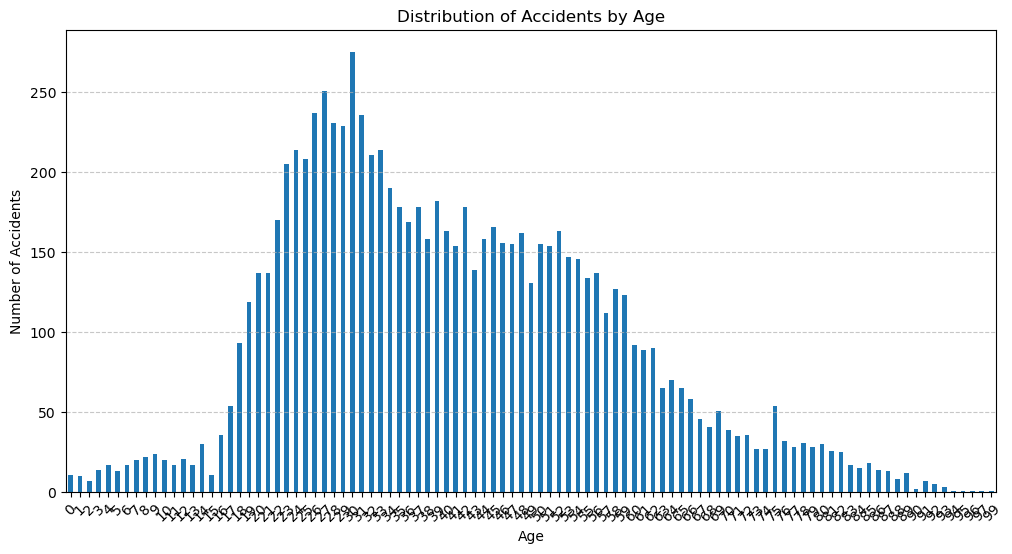

In [54]:
plt.figure(figsize=(12, 6))
accidents_by_person2020['Age'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Accidents by Age")
plt.xlabel("Age")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

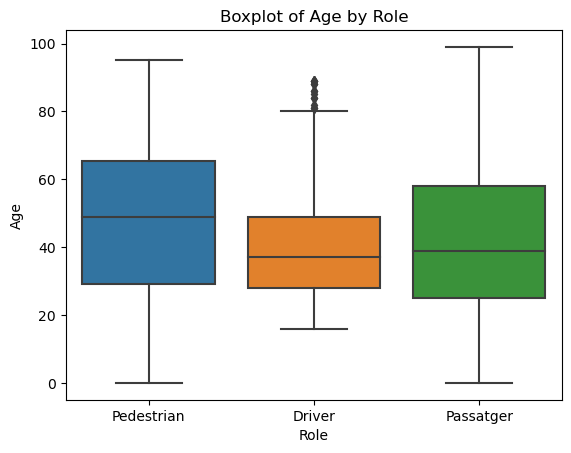

In [49]:
sns.boxplot(x='Person_Type_Description', y='Age', data=accidents_by_person2020)
plt.title('Boxplot of Age by Role')
plt.xlabel('Role')
plt.ylabel('Age')
plt.show()

En nuestro país no existe límite de edad para seguir conduciendo, pero a partir de los 65 se aumenta la periodicidad con la que se debe renovar el permiso. El seguir conduciendo no depende de la edad, sino del estado de las capacidades y aptitudes que tenga el conducto

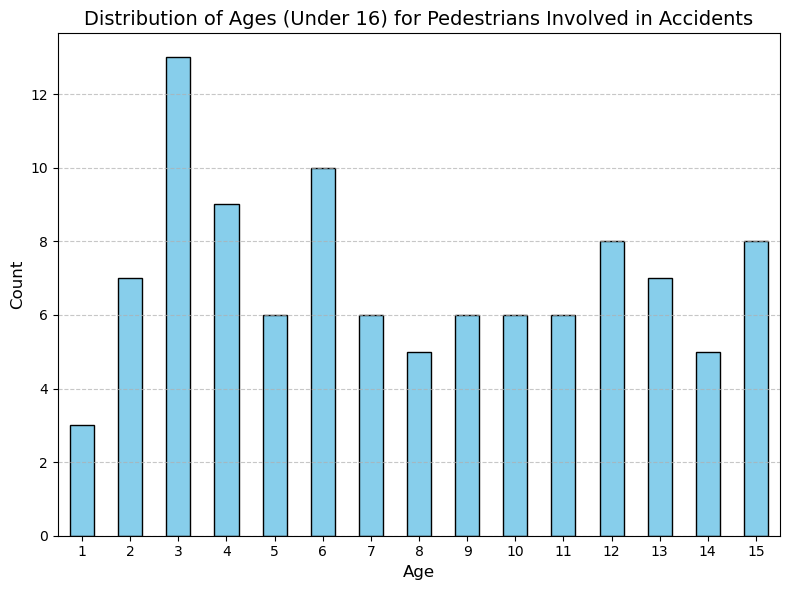

In [47]:

# Filter dataset for pedestrians under 16
incorrect_values = accidents_by_person2020[
    (accidents_by_person2020['Age'] < 16) & (accidents_by_person2020['Person_Type_Description'] == 'Pedestrian')
]

# Get the value counts for Age
age_counts = incorrect_values['Age'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Distribution of Ages (Under 16) for Pedestrians Involved in Accidents", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [35]:
# pedestrians look ok to me as we discussed I think we should keep them

In [48]:
# lets find duplicated case numers and delete them as we discussed 
accidents_by_person2020['Case_Number'] = accidents_by_person2020['Case_Number'].str.strip()
accidents_by_person2020['Case_Number'].value_counts()

/var/folders/7p/zttb20215d97cqdshpnkph4r0000gn/T/ipykernel_3985/766715393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidents_by_person2020['Case_Number'] = accidents_by_person2020['Case_Number'].str.strip()


2020S001756    11
2020S003876    10
2020S003414     9
2020S003974     8
2020S005636     7
               ..
2020S003653     1
2020S003651     1
2020S003644     1
2020S003640     1
2020S003135     1
Name: Case_Number, Length: 6210, dtype: int64

In [50]:
# Filter rows where 'Case_Number' is '2020S001756'
case_number_rows = accidents_by_person2020[accidents_by_person2020['Case_Number'] == '2020S001756']

# Display the filtered rows
print(case_number_rows)

      Case_Number District_Name Neighborhood_Name                 Street_Name  \
3684  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3685  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3686  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3687  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3688  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3689  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3690  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3691  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3692  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3693  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   
3694  2020S001756  Ciutat Vella    la Barceloneta  Joan Borbó Comte Barcelona   

     Day_of_Week        Dat

In [ ]:
# I am not going to detele duplicated rows yet because there might be a big accident with a lot of victims there
# if I will need to do it I would use this code 
# accidents_by_person2020 = accidents_by_person2020.drop_duplicates(subset='Case_Number', keep='first')
